### Here, I'm looking in the REC::Traj bank of some CLAS12 .hipo skims to see what the data looks like

In [1]:
# Import statements

import hipopy.hipopy as hipopy # <--- Package for reading in the hipo files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import ROOT
import timeit
import statistics

# Set LaTeX font for Matplotlib
rc('text', usetex=True)

# Set default plot font size
plt.rcParams['font.size'] = 16


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lnujpkze because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Welcome to JupyROOT 6.22/06


In [2]:
# opening up some .hipo files

filename0 = "/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_3_23_23/skim_50nA_OB_job_3313_0.hipo"
filename1 = "/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_3_23_23/skim_50nA_OB_job_3313_1.hipo"
filename2 = "/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_3_23_23/skim_50nA_OB_job_3313_2.hipo"
filename3 = "/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_3_23_23/skim_50nA_OB_job_3313_3.hipo"
filename4 = "/volatile/clas12/users/mfmce/mc_jobs_rga_vtx_3_23_23/skim_50nA_OB_job_3313_4.hipo"

hipo_file0 = hipopy.open(filename0,mode='r')
hipo_file1 = hipopy.open(filename1,mode='r')
hipo_file2 = hipopy.open(filename2,mode='r')
hipo_file3 = hipopy.open(filename3,mode='r')
hipo_file4 = hipopy.open(filename4,mode='r')

hipo_array = [hipo_file0, hipo_file1, hipo_file2, hipo_file3, hipo_file4]


# Showing the data types inside each bank

print("REC::Particle data","\n"+100*"=")
display(hipo_file1.getNamesAndTypes('REC::Particle'))
print(100*"=","\nREC::Traj data","\n"+100*"=")
display(hipo_file1.getNamesAndTypes('REC::Traj'))

REC::Particle data 


{'pid': 'I',
 'px': 'F',
 'py': 'F',
 'pz': 'F',
 'vx': 'F',
 'vy': 'F',
 'vz': 'F',
 'vt': 'F',
 'charge': 'B',
 'beta': 'F',
 'chi2pid': 'F',
 'status': 'S'}

REC::Traj data 


{'pindex': 'S',
 'index': 'S',
 'detector': 'B',
 'layer': 'B',
 'x': 'F',
 'y': 'F',
 'z': 'F',
 'cx': 'F',
 'cy': 'F',
 'cz': 'F',
 'path': 'F'}

compression type = 0 data length = 24682
compression type = 0 data length = 24682
compression type = 0 data length = 24682
compression type = 0 data length = 24682
compression type = 0 data length = 24682


In [3]:
# initializing some data

layers = []
detectors = []
x_data = []
y_data = []
z_data = []
paths = []
cx = []
cy = []
cz = []

# limit on iterations (for each hipo file)
Nevents = 1e5

start_time = timeit.default_timer()

for k,_ in enumerate(hipo_array):
    
    for i,_ in enumerate(hipo_array[k]):
        if (i > Nevents):
            break

        # pulling out data from each event
        detectors_temp = hipo_array[k].getBytes("REC::Traj", "detector")
        layers_temp = hipo_array[k].getBytes("REC::Traj", "layer")
        z_temp = hipo_array[k].getFloats("REC::Traj", "z")
        x_temp = hipo_array[k].getFloats("REC::Traj", "x")
        y_temp = hipo_array[k].getFloats("REC::Traj", "y")
        path_temp = hipo_array[k].getFloats("REC::Traj", "path")
        cz_temp = hipo_array[k].getFloats("REC::Traj", "cz")
        cx_temp = hipo_array[k].getFloats("REC::Traj", "cx")
        cy_temp = hipo_array[k].getFloats("REC::Traj", "cy")
        
        for j,_ in enumerate(z_temp):
            
            # only looking for data when particles are in the drift chambers
            if (detectors_temp[j] == 6): # drift chambers are given a value of 6 in the detectors data in the REC::Traj bank
                
                layers.append(layers_temp[j])
                detectors.append(detectors_temp[j])
                x_data.append(x_temp[j])
                y_data.append(y_temp[j])
                z_data.append(z_temp[j])
                paths.append(path_temp[j])
                cx.append(cx_temp[j])
                cy.append(cy_temp[j])
                cz.append(cz_temp[j])

    
print("time spent computing:", timeit.default_timer() - start_time)
print("z length:", len(z_data))
print("z max:", max(z_data))
print("z min:", min(z_data))
print("z entries per event:", len(z_data) / Nevents / len(hipo_array))

time spent computing: 170.9288176894188
z length: 4828638
z max: 716.7659912109375
z min: 59.89765167236328
z entries per event: 9.657276


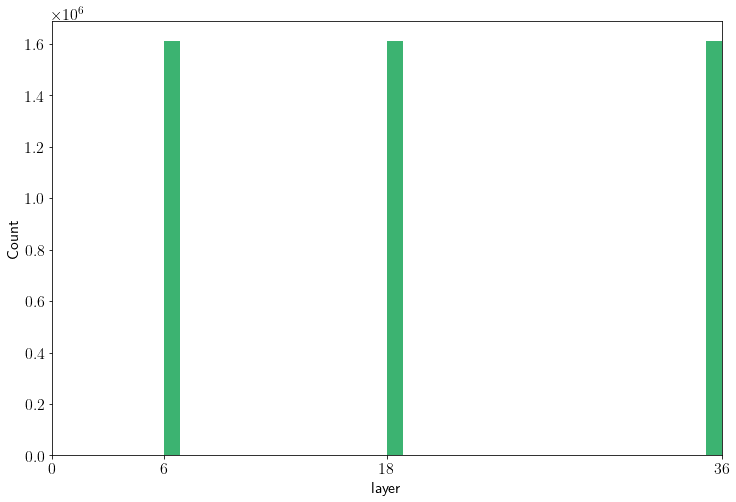

In [4]:
# What do the layer hits look like? Which layers are the particles going through?

plt.figure(figsize=(12, 8))
plt.hist(layers, bins=35, color="mediumseagreen")
plt.ylabel("Count")
plt.xlabel("layer")
plt.xlim(1, 36)
plt.xticks([0, 6, 18, 36])
plt.show()

So we are only getting hits in the drift chambers from layers 6, 18, and 36.

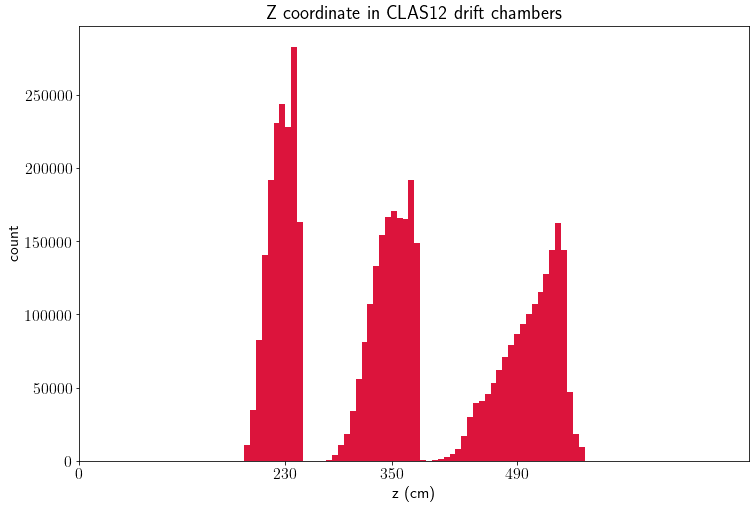

In [5]:
# Z data

plt.figure(figsize=(12, 8))
plt.hist(z_data, bins=100, color="crimson")
plt.xlabel("z (cm)")
plt.ylabel("count")
plt.title("Z coordinate in CLAS12 drift chambers")
plt.xticks([0, 230, 350, 490]) # CLAS12 drift chambers were designed as: Region 1 (230cm), Region 2 (350cm), Region 3 (490cm)
plt.show()

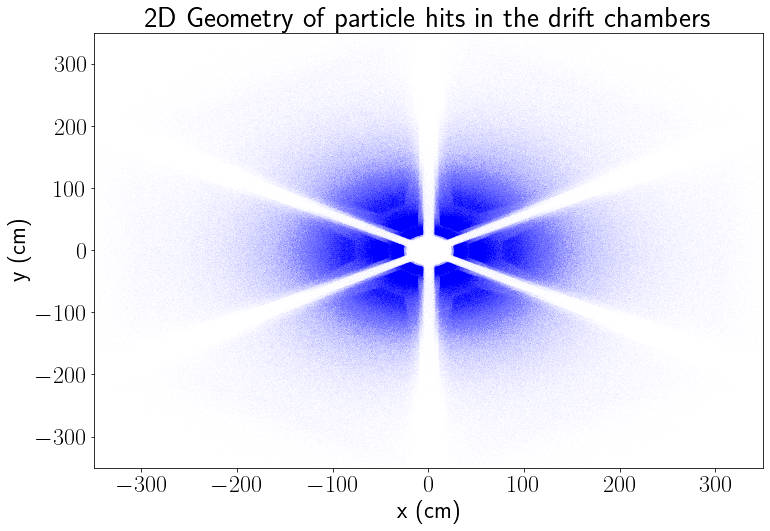

In [6]:
# x vs. y data in the drift chambers
plt.rcParams['font.size'] = 24

plt.figure(figsize=(12, 8))
plt.scatter(x_data, y_data, s=.00001, c="blue")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-350, 350)
plt.ylim(-350, 350)
plt.title("2D Geometry of particle hits in the drift chambers")
plt.show()

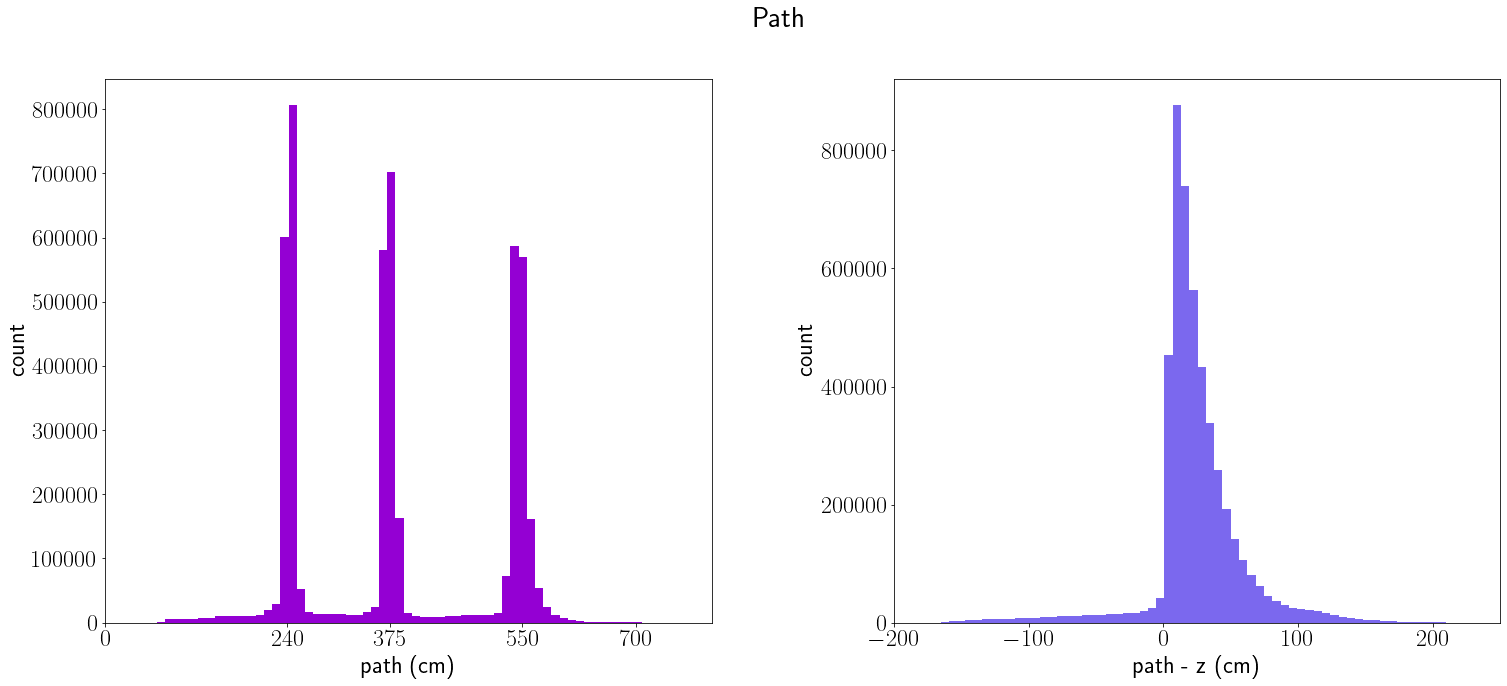

In [7]:
# path data, looking at just the path and the difference between path and z

fig, axs = plt.subplots(1, 2, figsize=(25,10))

fig.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

axs[0].hist(paths, bins=100, color="darkviolet")
axs[0].set_xlabel("path (cm)")
axs[0].set_ylabel("count")
axs[0].set_xticks([0, 240, 375, 550, 700])
axs[0].set_xlim(0, 800)

axs[1].hist(np.array(paths) - np.array(z_data), bins=200, color="mediumslateblue")
axs[1].set_xlabel("path - z (cm)")
axs[1].set_ylabel("count")
axs[1].set_xlim(-200, 250)

fig.suptitle("Path")

plt.show()

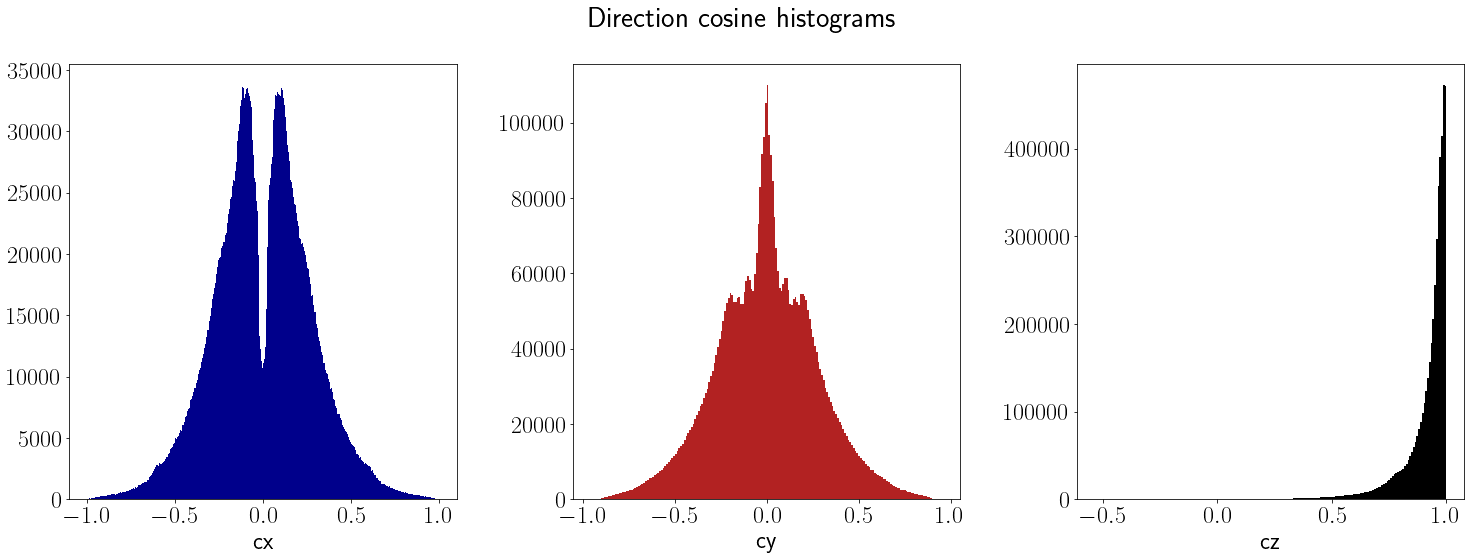

In [8]:
# seeing if there is anything interesting in the direction cosines

fig, axs = plt.subplots(1, 3, figsize=(25,8))

fig.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

axs[0].hist(cx, bins=500, color="darkblue")
axs[0].set_xlabel("cx")

axs[1].hist(cy, bins=200, color="firebrick")
axs[1].set_xlabel("cy")

axs[2].hist(cz, bins=200, color="black")
axs[2].set_xlabel("cz")

fig.suptitle("Direction cosine histograms")
plt.show()

In [9]:
# initializing some data

x_data_cut = []
y_data_cut = []
z_data_cut = []


# limit on iterations (for each hipo file)
Nevents = 1e5

start_time = timeit.default_timer()

for k,_ in enumerate(hipo_array):
    
    for i,_ in enumerate(hipo_array[k]):
        if (i > Nevents):
            break

        # pulling out data from each event
        detectors_temp = hipo_array[k].getBytes("REC::Traj", "detector")
        z_temp = hipo_array[k].getFloats("REC::Traj", "z")
        x_temp = hipo_array[k].getFloats("REC::Traj", "x")
        y_temp = hipo_array[k].getFloats("REC::Traj", "y")
        distance_temp = np.sqrt(np.array(x_temp) ** 2 + np.array(y_temp) ** 2)
        
        for j,_ in enumerate(z_temp):
            
            # only looking for data when particles are in the drift chambers
            # also cutting for a specific range for the particles' distance from (x,y) = (0,0)
            if ((detectors_temp[j] == 6) and (distance_temp[j] > 110) and (distance_temp[j] < 140)): # drift chambers are given a value of 6 in the detectors data in the REC::Traj bank
                x_data_cut.append(x_temp[j])
                y_data_cut.append(y_temp[j])
                z_data_cut.append(z_temp[j])


    
print("time spent computing:", timeit.default_timer() - start_time)
print("z length:", len(z_data_cut))
print("z entries per event:", len(z_data_cut) / Nevents / len(hipo_array))

time spent computing: 180.7409379016608
z length: 822615
z entries per event: 1.6452300000000002


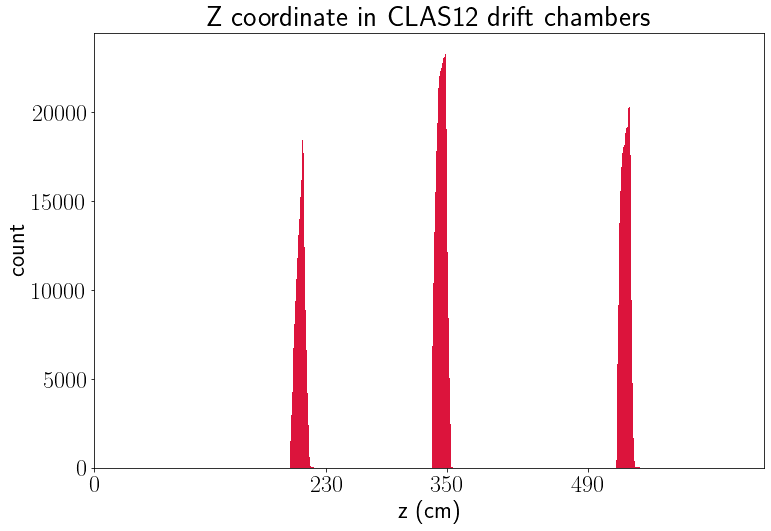

In [10]:
# Z data

plt.figure(figsize=(12, 8))
plt.hist(z_data_cut, bins=500, color="crimson")
plt.xlabel("z (cm)")
plt.ylabel("count")
plt.title("Z coordinate in CLAS12 drift chambers")
plt.xticks([0, 230, 350, 490]) # CLAS12 drift chambers were designed as: Region 1 (230cm), Region 2 (350cm), Region 3 (490cm)
plt.show()